# Label Encoding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

## Reading the data

In [2]:
data = pd.read_csv(r"..\Data\raw-data\small.csv", sep=';')
data = data.drop('duration',axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


<Axes: xlabel='y', ylabel='count'>

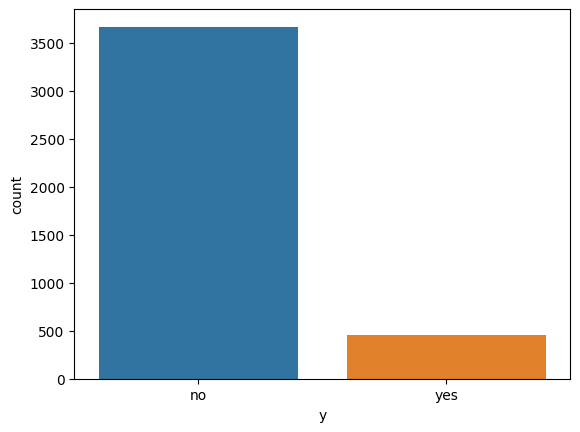

In [3]:
sns.countplot(x='y',data=data)

### We can see that the data is very skewed, so we duplicate the tuples corresponding to 'yes'

In [4]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

<Axes: xlabel='y', ylabel='count'>

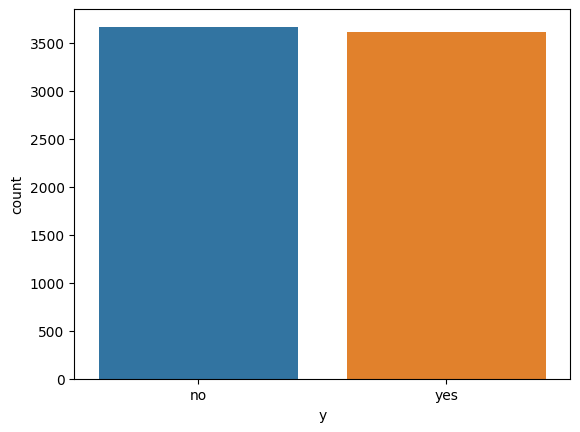

In [5]:
sns.countplot(x='y',data=data)

## Now the data looks much more balanced

## Aanalising the data distribution by plotting graphs for numerical fields 

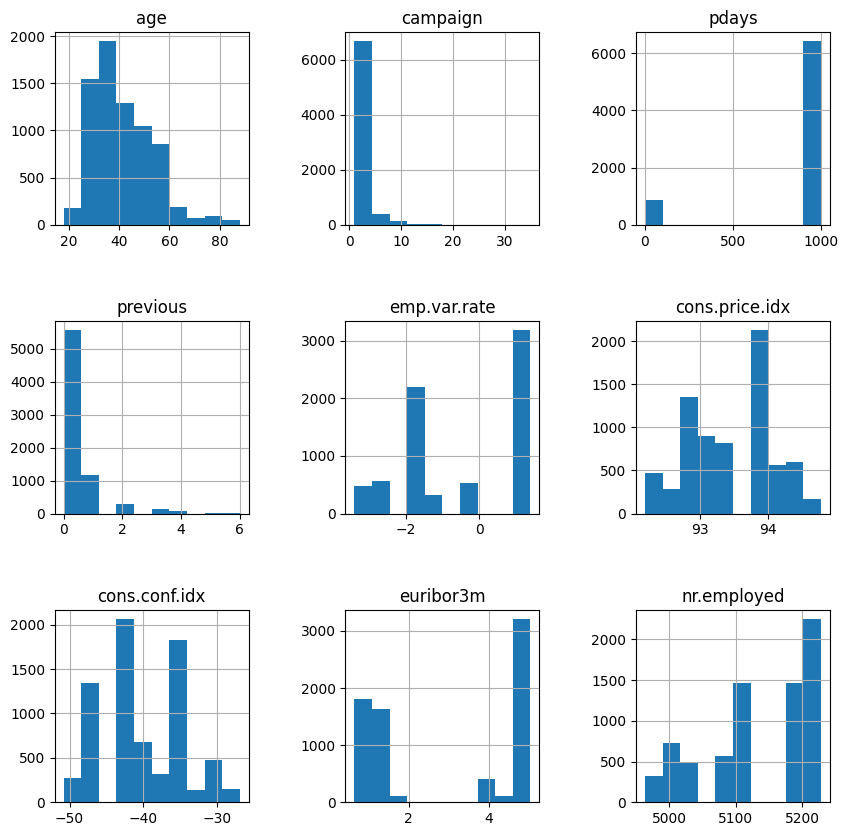

In [6]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

## We can see that the data is not evenly distributed, therefore we need to standardize

## Splitting 'pdays' feature into 2 features(i.e. 'pdays' and 'pdays2')

In [7]:
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data['pdays2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data['pdays']=data['pdays'].astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,30,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,30,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,30,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,30,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


## Standardizing the data

In [8]:
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,0.171429,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,1.0,0.0,nonexistent,0.333333,0.269680,0.192469,0.153741,0.512287,no,0
1,0.300000,services,single,high.school,no,no,no,telephone,may,fri,...,1.0,0.0,nonexistent,0.937500,0.698753,0.602510,0.956916,0.859735,no,0
2,0.100000,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,0.0,nonexistent,1.000000,0.882307,0.376569,0.981179,1.000000,no,0
3,0.285714,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,1.0,0.0,nonexistent,1.000000,0.882307,0.376569,0.980499,1.000000,no,0
4,0.414286,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,0.0,nonexistent,0.687500,0.389322,0.368201,0.806349,0.877883,no,0


## Label Encoding

In [10]:
le = preprocessing.LabelEncoder()
data.job = le.fit_transform(data.job)
data.marital = le.fit_transform(data.marital)
data.education = le.fit_transform(data.education)
data.default = le.fit_transform(data.default)
data.housing = le.fit_transform(data.housing)
data.loan = le.fit_transform(data.loan)
data.contact = le.fit_transform(data.contact)
data.month = le.fit_transform(data.month)
data.day_of_week = le.fit_transform(data.day_of_week)
data.poutcome = le.fit_transform(data.poutcome)
data.y = le.fit_transform(data.y)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,0.171429,1,1,2,0,2,0,0,6,0,...,1.0,0.0,1,0.333333,0.269680,0.192469,0.153741,0.512287,0,0
1,0.300000,7,2,3,0,0,0,1,6,0,...,1.0,0.0,1,0.937500,0.698753,0.602510,0.956916,0.859735,0,0
2,0.100000,7,1,3,0,2,0,1,4,4,...,1.0,0.0,1,1.000000,0.882307,0.376569,0.981179,1.000000,0,0
3,0.285714,7,1,2,0,1,1,1,4,0,...,1.0,0.0,1,1.000000,0.882307,0.376569,0.980499,1.000000,0,0
4,0.414286,0,1,6,0,2,0,0,7,1,...,1.0,0.0,1,0.687500,0.389322,0.368201,0.806349,0.877883,0,0


In [11]:
data.shape

(7276, 21)

In [12]:
data.to_csv(r"..\Data\small_le.csv", index=False)

## Label Encoding Done!

### Note: Every Model used One Hot Encoded Data, except Random Forest Classifier which uses Label Encoded Data